# Making plots with python

# What is matplotlib?

I hope I don’t have to detail why data visualization is important. Data visualization helps you to better understand your data, discover things that you wouldn’t discover in raw format and communicate your findings more efficiently to others. The best and most well-known Python data visualization library is Matplotlib. I wouldn’t say it’s easy to use… But usually if you save for yourself the 4 or 5 most commonly used code blocks for basic line charts and scatter plots, you can create your charts pretty fast.


Gallery of examples:
https://matplotlib.org/2.0.2/gallery.html

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

It's important to specify that you would like to have figures plotted in the notebook (otherwise, you will not be able to see the plots). You can do this by typing the command ```%matplotlib inline```

In [3]:
%matplotlib inline

The option below allows for higher resolution plots

In [44]:
%config InlineBackend.figure_format ='retina'

# Most common 2D-plot functions

```plt.plot```, ```plt.scatter```, ```plt.contour```, ```plt.hist```

Let's test those functions on the dataset provided by Isabel

In [44]:
path = 'C:/Users/yellow_chocobo/Desktop/python_class/data/Isabel/'
filename = 'Edmundson_data_python_DEEP.xlsx'

# let's load the data with the help of the pandas function
data = pd.read_excel(path + filename)

data.head()

Area  Overburden  HC_column  Trap_height  Trap_fill_%  \
0     1        1281         89          153           58   
1     1        2292        151          160           94   
2     1        2806         77          320           24   
3     1        1278         18           18          100   
4     1        1281         40           40          100   

   Trap_fill_normalised_%  
0                      58  
1                      94  
2                      24  
3                     100  
4                     100

### plt.plot

Text(0,0.5,'Trap height')

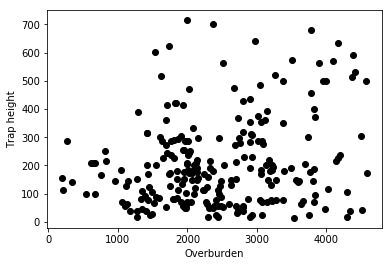

In [54]:
#plt.plot? # I advice you to run the help function to look at all the available flags
plt.plot(data.Overburden, data.Trap_height,"ko")
plt.xlabel("Overburden")
plt.ylabel("Trap height")

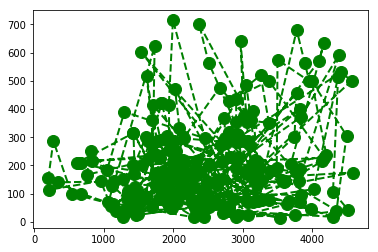

In [48]:
#plt.plot? # I advice you to run the help function to look at all the available flags
plt.plot(data.Overburden, data.Trap_height,color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.xlabel("Overburden")
plt.ylabel("Trap height")

### plt.scatter

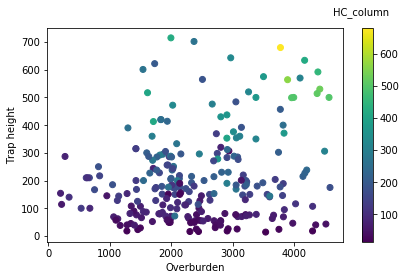

In [59]:
plt.scatter(data.Overburden, data.Trap_height, c = data.HC_column)
plt.xlabel("Overburden")
plt.ylabel("Trap height")
clb = plt.colorbar()
clb.set_label('HC_column', labelpad=-38, y=1.1, rotation=0)
plt.tight_layout()

### plt.hist

Text(0,0.5,'n of values')

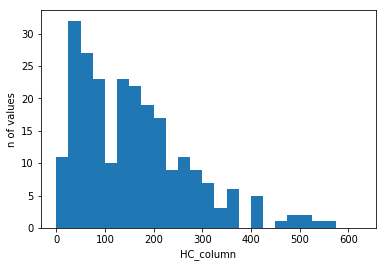

In [64]:
#plt.hist?
plt.hist(data.HC_column, bins = np.arange(0, 650, 25))
plt.xlabel('HC_column')
plt.ylabel('n of values')

### plt.contour

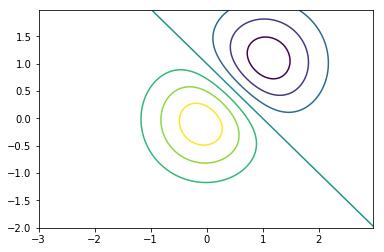

In [69]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

plt.contour(X, Y, Z)

# Visualization of an image

In [14]:
import matplotlib.image as mpimg #if only interested in a specific function in the matplotlib module 

In [15]:
image = 'C:/Users/yellow_chocobo/Desktop/python_class/python_small_lessons/images/mars.png'

img = mpimg.imread(image)

# number of rows, columns, and channels (so actually 3D-array!, channels: red, green, blue, transparency)
print (np.shape(img))

(500, 500, 4)


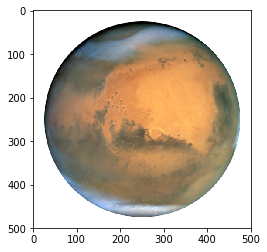

In [20]:
# plotting with all the channels (4 channels)
plt.imshow(img)

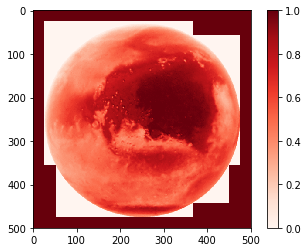

In [15]:
# plotting with all the channels (channel 1: Red)
plt.imshow(img[:,:,0], cmap = 'Reds')
plt.colorbar()

### More information about available colormaps can be found here
https://matplotlib.org/examples/color/colormaps_reference.html

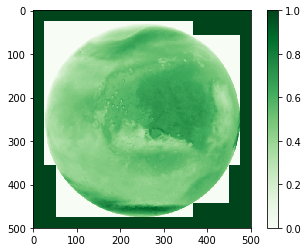

In [17]:
# plotting with all the channels (channel 2: Green)
plt.imshow(img[:,:,1], cmap = 'Greens')
plt.colorbar()

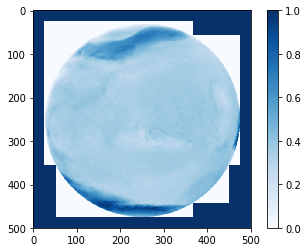

In [18]:
# plotting with all the channels (channel 3: Blue)
plt.imshow(img[:,:,2], cmap = 'Blues')
plt.colorbar()

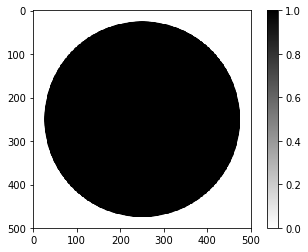

In [21]:
# plotting with all the channels (channel 4: Transparency)
plt.imshow(img[:,:,3], cmap = 'binary')
plt.colorbar()

## Differences between plotting directly with plt and defining figure(s) and axes

There are two different ways of plotting things in python
- the "quick and dirty" direct way (using plt.plot or plt.some_other_plotting_functions)
- by defining figure, axis and plot variables that can be used to tune in a more accurate way your plots

Be aware that the function attached to plt.xxx is different from ax1.xxx
For example for writing a title, you will use ```plt.title("write title here")``` but when you work with axes, it will be ```ax.set_title("write title here")```

The more serious way: defining figure, axis and plot variables that can be used to tune in a more accurate way your plots

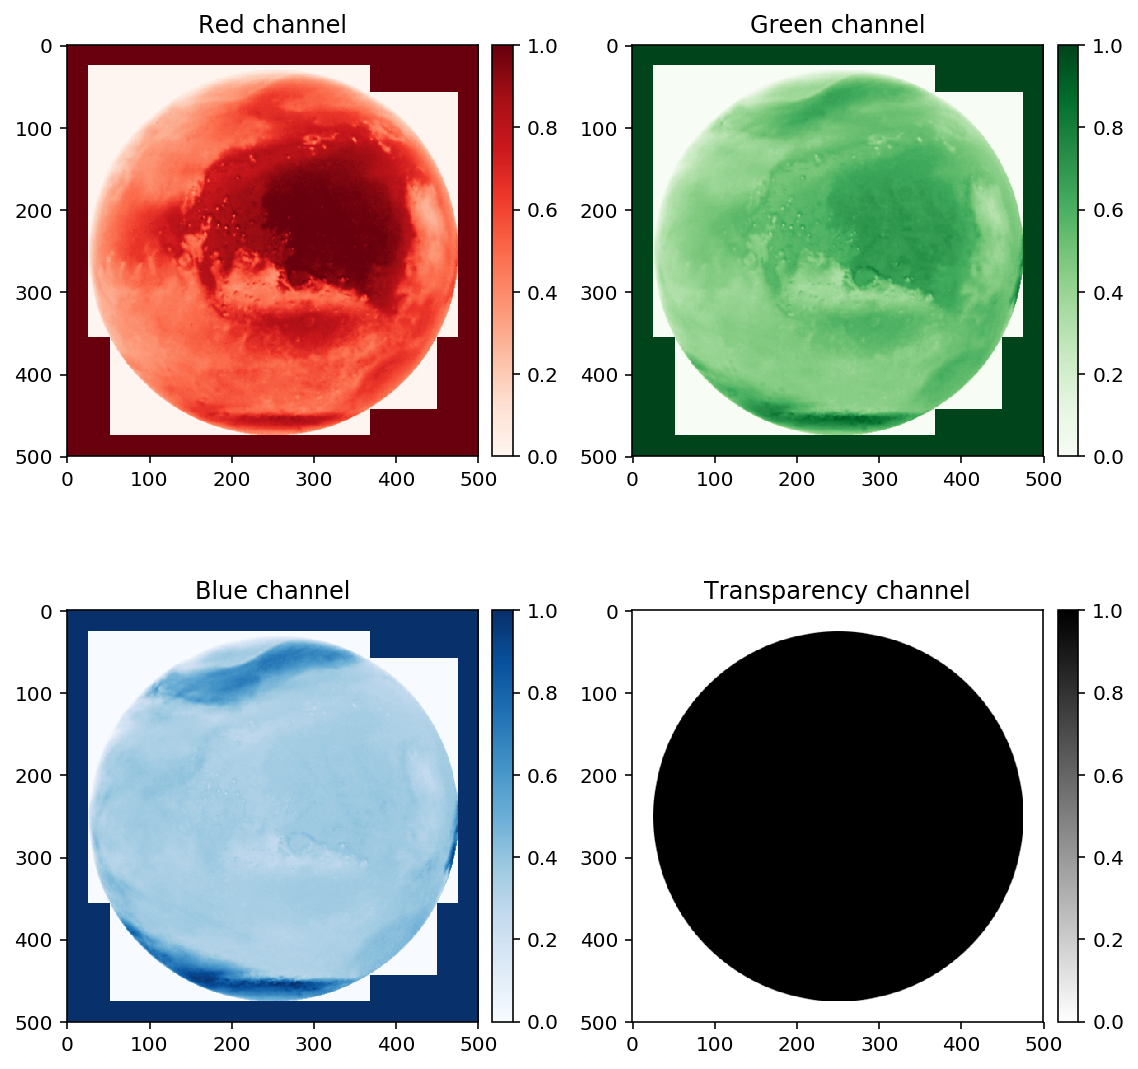

In [45]:
from mpl_toolkits.axes_grid1 import make_axes_locatable #to specify the locations of colorbars in subplots

# size of the figure in inch
fig = plt.figure(figsize=(8,8))

# geometry of subplots (2 rows and 2 columns)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# make a list of subtitles and colormaps used
titles = ['Red channel', 'Green channel', 'Blue channel', 'Transparency channel']
cbars = ['Reds', 'Greens', 'Blues', 'binary']

ax1.set_title('Red channel')
ax2.set_title('Green channel')
ax3.set_title('Blue channel')
ax4.set_title('Transparency channel')

# Figure 1
im1 = ax1.imshow(img[:,:,0], cmap = cbars[0])

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im1, cax=cax1, orientation='vertical')

# Figure 2
im2 = ax2.imshow(img[:,:,1], cmap = cbars[1])

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im2, cax=cax2, orientation='vertical')

# Figure 3
im3 = ax3.imshow(img[:,:,2], cmap = cbars[2])

divider = make_axes_locatable(ax3)
cax2 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im3, cax=cax2, orientation='vertical')

# Figure 4
im4 = ax4.imshow(img[:,:,3], cmap = cbars[3])

divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im4, cax=cax4, orientation='vertical')

fig.tight_layout() # avoid overlap between colorbars, titles, figures and so on...

## How can you save the figure you have just created?

**Other tweaks you can use**
- **format** : can be specified in the name of the figure (here .png)
- **dpi** : resolution of the image
- **background color** : either on fig.savefig or option on axes (see https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866)  
- **transparency** : transparent=True in fig.savefig


In [36]:
# fig.savefig? #for info
# %pwd # to see where the .png files are saved to
fig.savefig("filename_figure_normal.png", dpi = 300)

# How to customize your plots?

**Transparent background**

In [ ]:
#need to rerun the script to recreate the plot
fig.savefig("filename_figure_transparent.png", dpi = 300, transparent=True)

**Background filled with specific color**

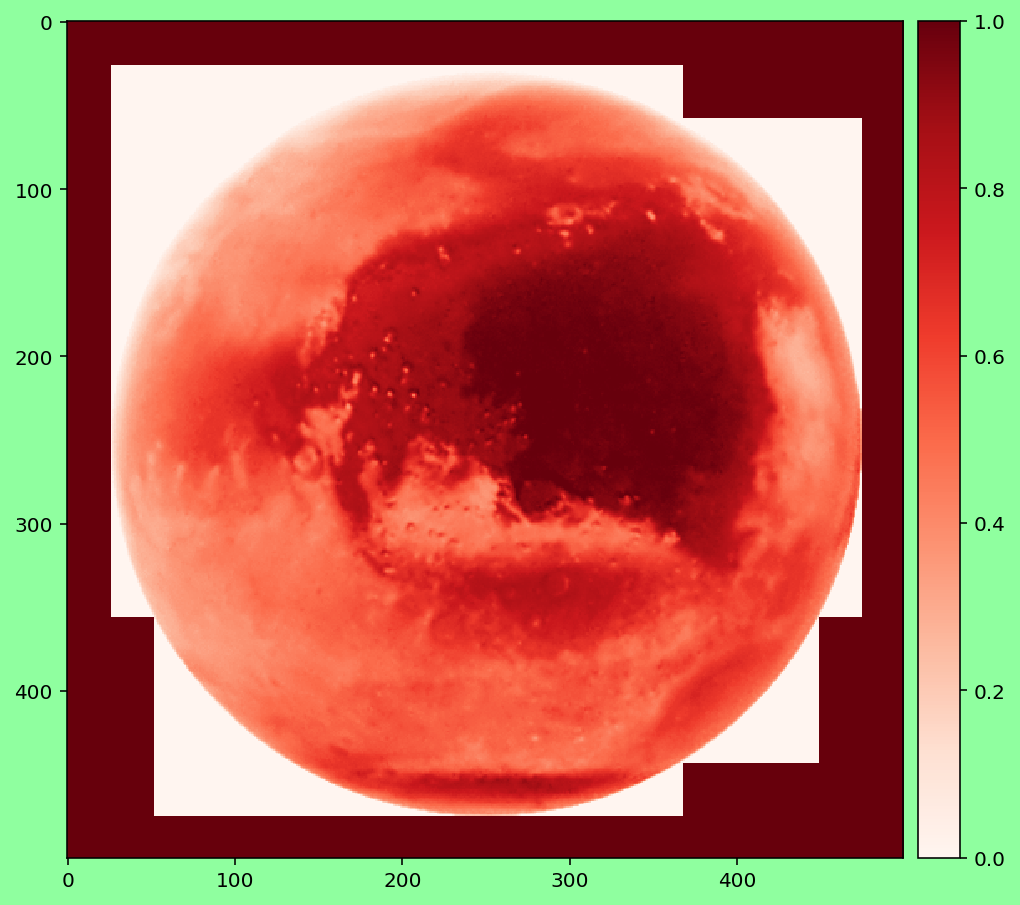

In [58]:
# size of the figure in inch
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
im1 = ax1.imshow(img[:,:,0], cmap = cbars[0])

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im1, cax=cax1, orientation='vertical')

fig.patch.set_facecolor('xkcd:mint green')

## How to Plot Only One Colorbar for Multiple Plot Using Matplotlib
https://jdhao.github.io/2017/06/11/mpl_multiplot_one_colorbar/

C:\Users\yellow_chocobo\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


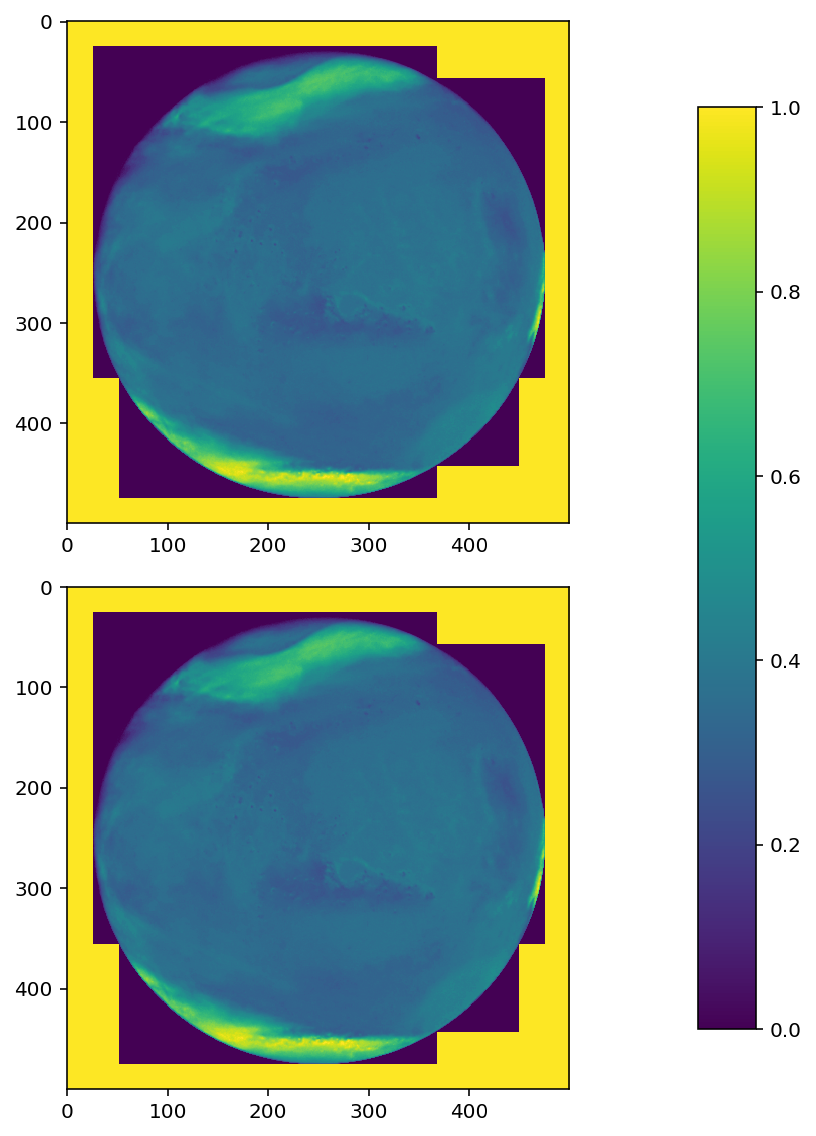

In [73]:
# size of the figure in inch
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

for ax in axes.flat:
    
    im = ax.imshow(img[:,:,i], cmap='viridis',
                       vmin=0, vmax=1)
        

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.05, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
fig.tight_layout()


## Subfigures of different sizes

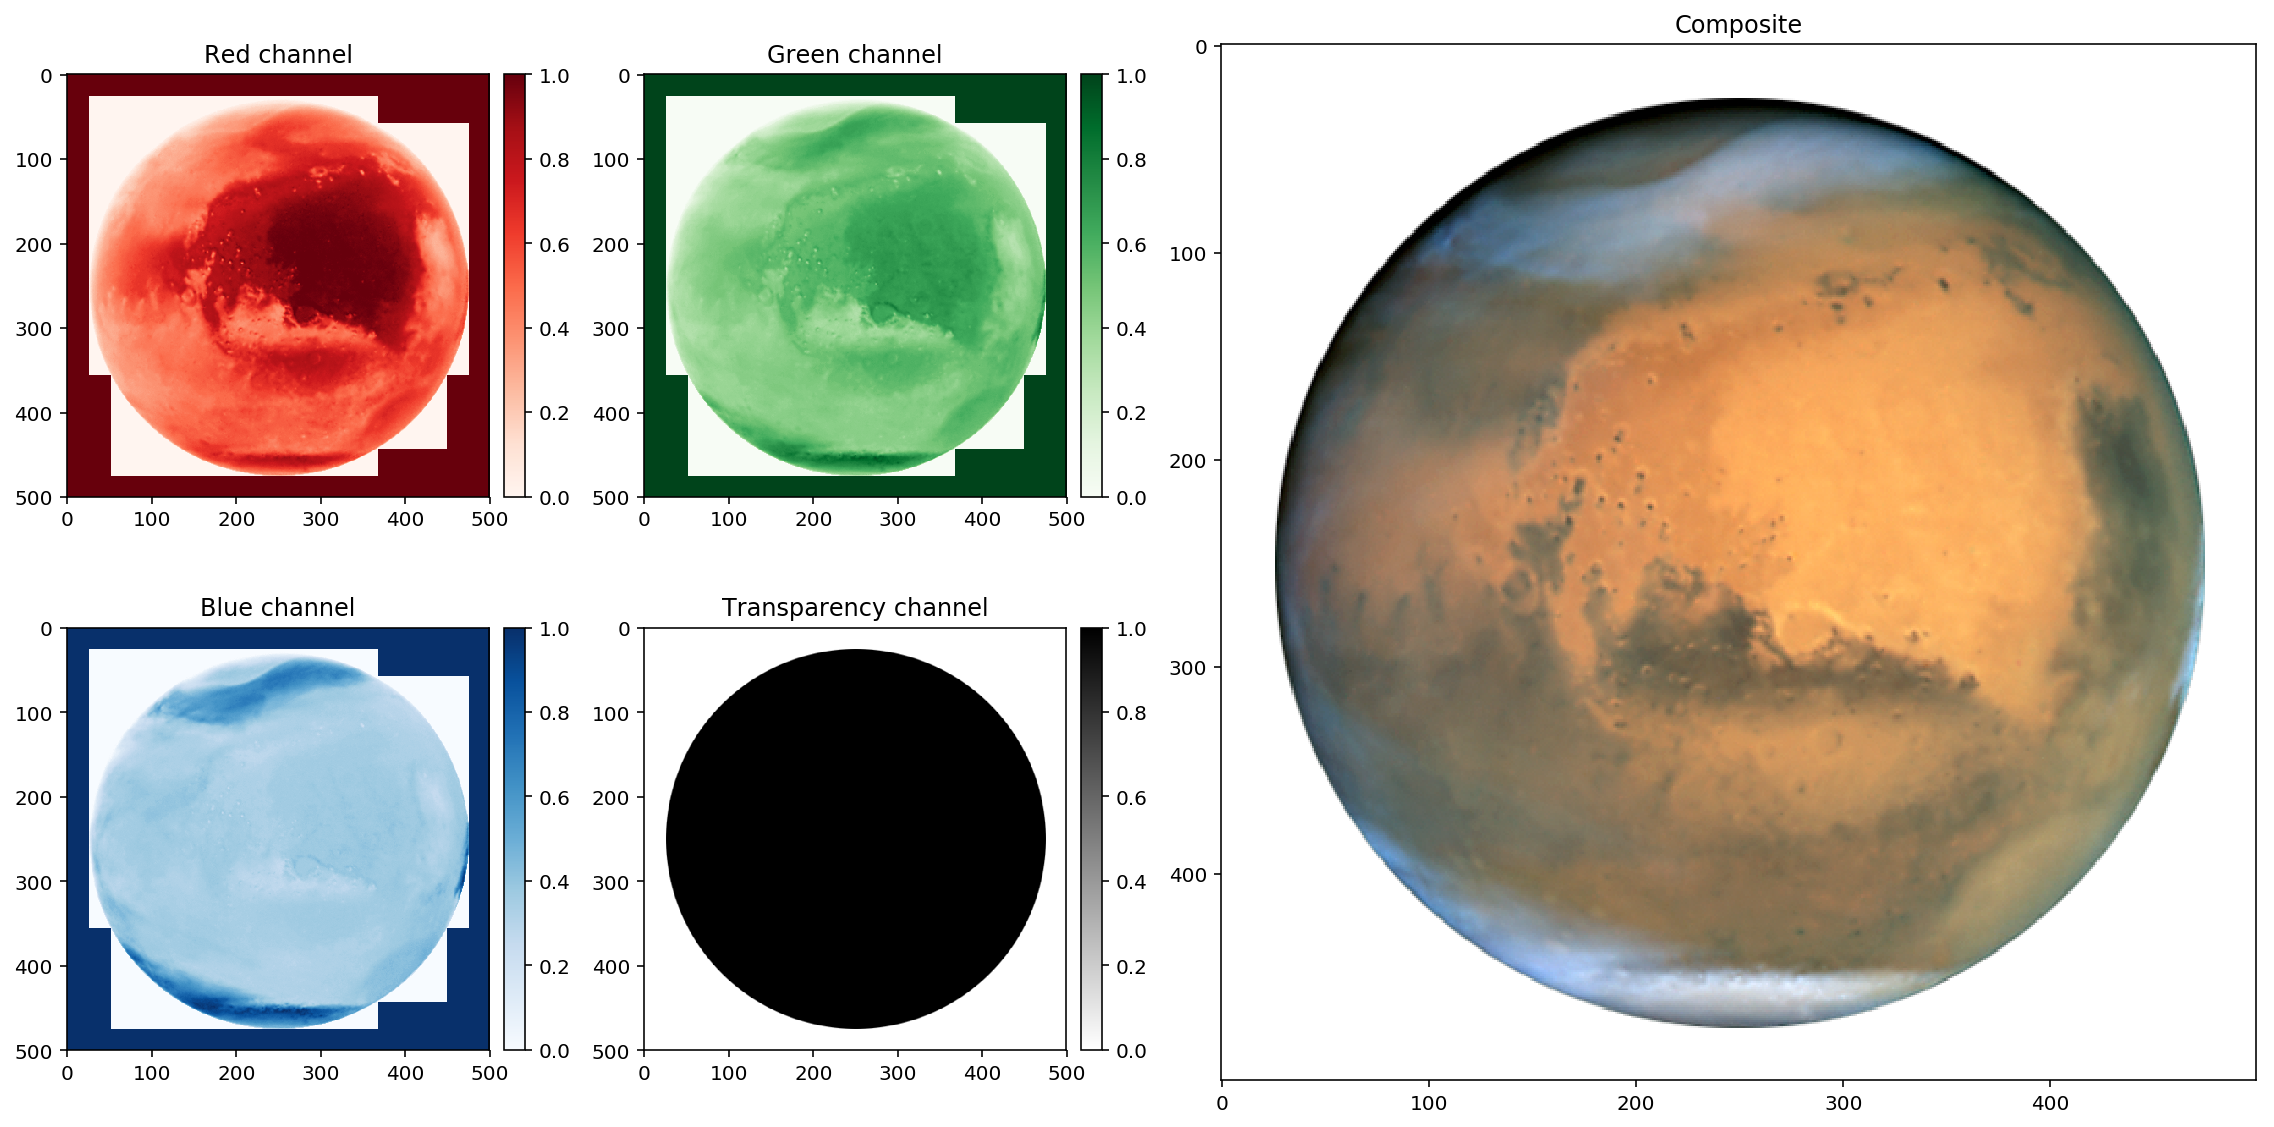

In [54]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16,8))

gs=GridSpec(2,4) # 2 rows, 4 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column (from the top)
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[1,0]) # Second row, first column
ax4=fig.add_subplot(gs[1,1]) # Second row, second column
ax5=fig.add_subplot(gs[:,2:]) # Span all rows, third and fourth column

# make a list of subtitles and colormaps used
titles = ['Red channel', 'Green channel', 'Blue channel', 'Transparency channel']
cbars = ['Reds', 'Greens', 'Blues', 'binary']

ax1.set_title('Red channel')
ax2.set_title('Green channel')
ax3.set_title('Blue channel')
ax4.set_title('Transparency channel')
ax5.set_title('Composite')

# Figure 1
im1 = ax1.imshow(img[:,:,0], cmap = cbars[0])

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im1, cax=cax1, orientation='vertical')

# Figure 2
im2 = ax2.imshow(img[:,:,1], cmap = cbars[1])

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im2, cax=cax2, orientation='vertical')

# Figure 3
im3 = ax3.imshow(img[:,:,2], cmap = cbars[2])

divider = make_axes_locatable(ax3)
cax2 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im3, cax=cax2, orientation='vertical')

# Figure 4
im4 = ax4.imshow(img[:,:,3], cmap = cbars[3])

divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im4, cax=cax4, orientation='vertical')

# Figure 5
im5 = ax5.imshow(img)

fig.tight_layout() # avoid overlap between colorbars, titles, figures and so on...

## Subscript, special characters

More info here: https://matplotlib.org/users/mathtext.html

Text(0.5,1,'$\\alpha > \\beta$')

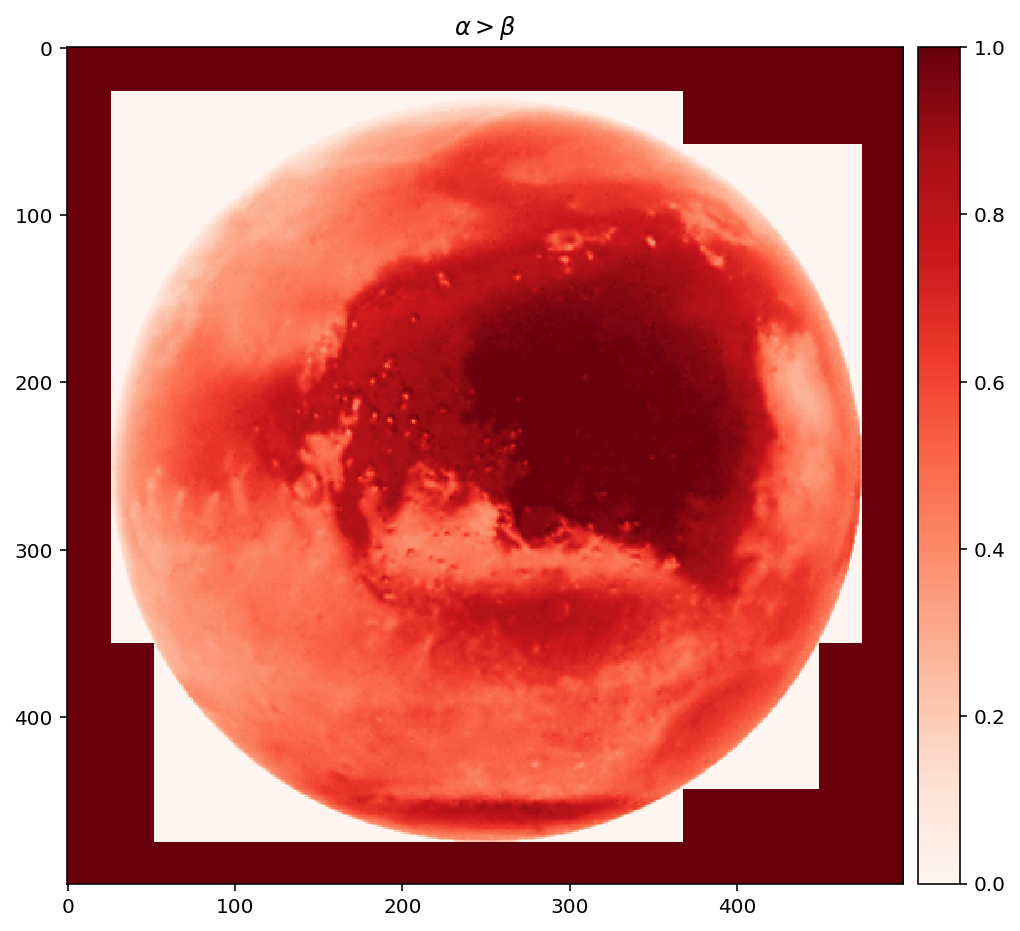

In [74]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
im1 = ax1.imshow(img[:,:,0], cmap = cbars[0])

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im1, cax=cax1, orientation='vertical')

# math text
ax1.set_title(r'$\alpha > \beta$')

## Texts of different sizes
If you want to place text in different locations (see https://matplotlib.org/users/text_props.html)

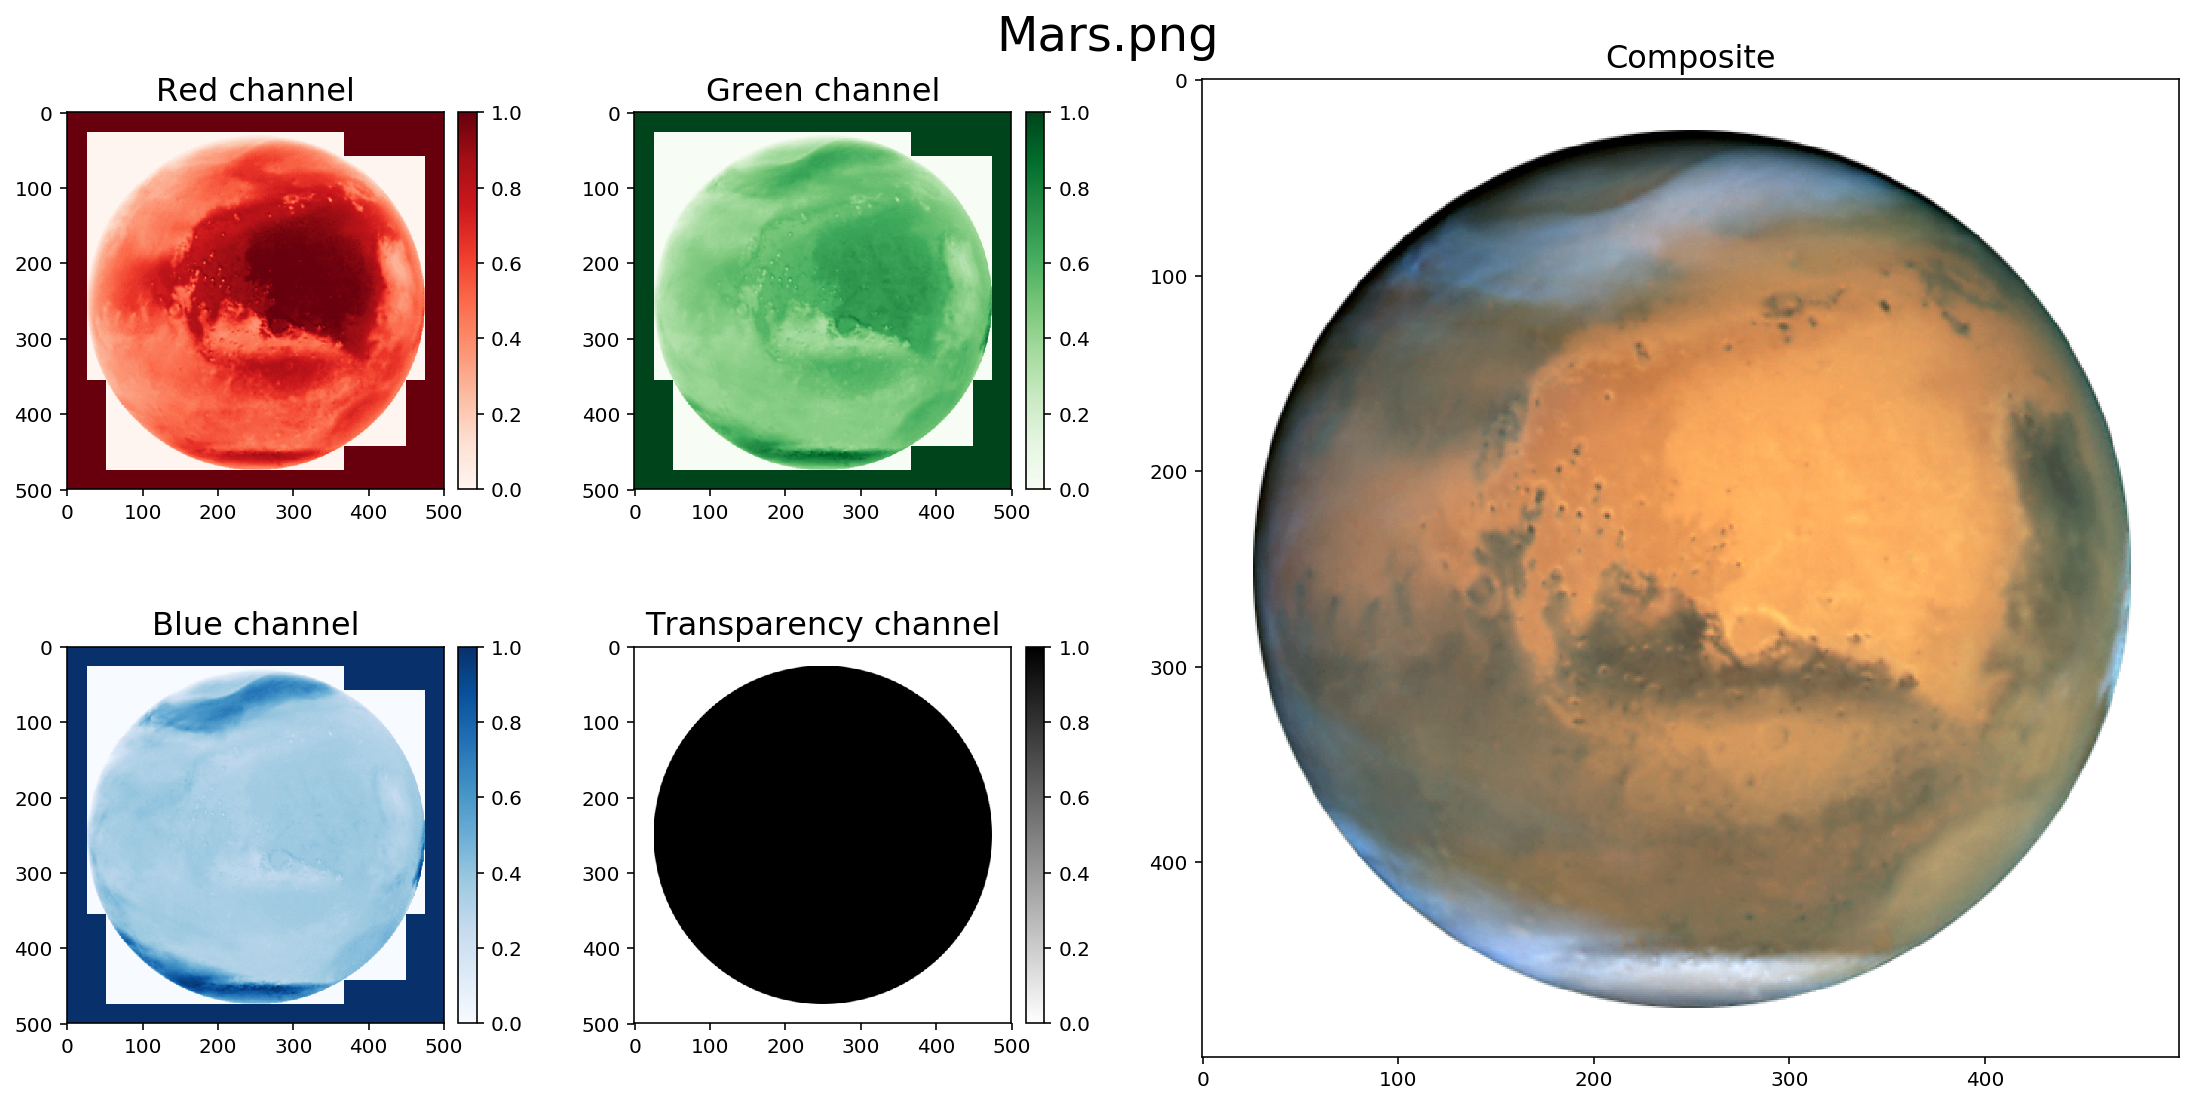

In [79]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16,8))

gs=GridSpec(2,4) # 2 rows, 4 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column (from the top)
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[1,0]) # Second row, first column
ax4=fig.add_subplot(gs[1,1]) # Second row, second column
ax5=fig.add_subplot(gs[:,2:]) # Span all rows, third and fourth column

# make a list of subtitles and colormaps used
titles = ['Red channel', 'Green channel', 'Blue channel', 'Transparency channel']
cbars = ['Reds', 'Greens', 'Blues', 'binary']

ax1.set_title('Red channel', fontsize = 16)
ax2.set_title('Green channel', fontsize = 16)
ax3.set_title('Blue channel', fontsize = 16)
ax4.set_title('Transparency channel', fontsize = 16)
ax5.set_title('Composite', fontsize = 16)

# Figure 1
im1 = ax1.imshow(img[:,:,0], cmap = cbars[0])

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im1, cax=cax1, orientation='vertical')

# Figure 2
im2 = ax2.imshow(img[:,:,1], cmap = cbars[1])

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im2, cax=cax2, orientation='vertical')

# Figure 3
im3 = ax3.imshow(img[:,:,2], cmap = cbars[2])

divider = make_axes_locatable(ax3)
cax2 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im3, cax=cax2, orientation='vertical')

# Figure 4
im4 = ax4.imshow(img[:,:,3], cmap = cbars[3])

divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.10)
fig.colorbar(im4, cax=cax4, orientation='vertical')

# Figure 5
im5 = ax5.imshow(img)

fig.suptitle('Mars.png', fontsize = 24)
fig.tight_layout(pad=3) # add extra white space


## Avoid the automatic plotting of a figure (useful if you save lot of snapshots)

In [37]:
#plt.ioff() #don't run otherwise you will not see your figures from now on!

# Visualization of an image (3D-array)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

## imshow
Minimum value is in the lower left

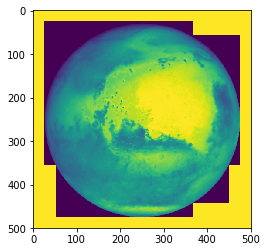

In [20]:
# example with a crater in 3D

h = plt.imshow(img[:,:,0])


## pcolor
The y-axis is turned upside down

(0.0, 499.0, 0.0, 499.0)

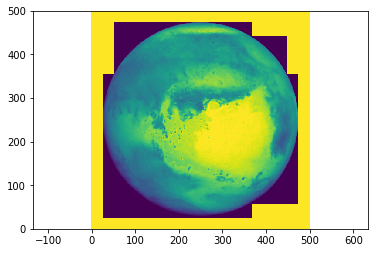

In [36]:
plt.pcolor(np.arange(500),np.arange(500), img[:,:,0])
plt.axis('equal')

This can be fixed by swaping the y-axis with the help of ```[::-1]``` (reverse the array)

(0.0, 499.0, 0.0, 499.0)

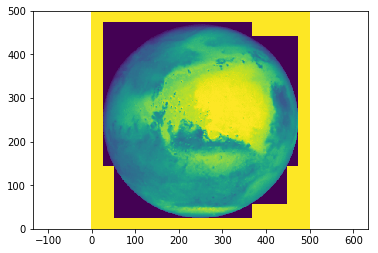

In [37]:
plt.pcolor(np.arange(500),np.arange(500)[::-1], img[:,:,0])
plt.axis('equal')

## pcolormesh
```pcolormesh``` should be used over ```pcolor``` (much faster to plot the figure)

(0.0, 499.0, 0.0, 499.0)

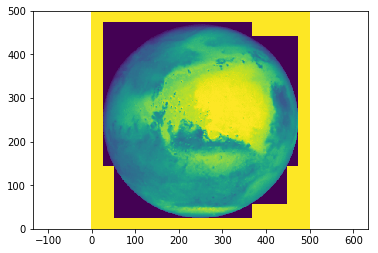

In [40]:
plt.pcolormesh(np.arange(500),np.arange(500)[::-1], img[:,:,0])
plt.axis('equal')

## Scatter plots (3D-axes)

In [81]:
# let's load a new example
path = 'C:/Users/yellow_chocobo/Desktop/python_class/data/Nils/'
filename = 'crater0000.asc'

# let's load the data with the help of numpy
topography_crater = np.loadtxt(path + filename, skiprows=6)

topography_crater

array([[-5852., -5851., -5842., ...,   839.,   826.,   813.],
       [-5877., -5874., -5862., ...,   839.,   830.,   817.],
       [-5901., -5901., -5886., ...,   835.,   827.,   818.],
       ...,
       [ 3177.,  3186.,  3206., ..., -7088., -7092., -7091.],
       [ 3182.,  3193.,  3208., ..., -7090., -7089., -7087.],
       [ 3185.,  3191.,  3212., ..., -7092., -7092., -7083.]])

In [82]:
np.shape(topography_crater) # 1540 rows and columns

(1540, 1540)

In [86]:
cellsize = 60 # meters
xs = np.arange(0,1540)*cellsize # along x-axis
ys = np.arange(0,1540)*cellsize # along y-axis

xc, yc = np.meshgrid(xs, ys) # create a meshgrid

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# maybe need to do this part in Spyder
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xc[:500], yc[:500], topography_crater[:500])

## Wireframe plots (3D-axes)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xc[:500], yc[:500], topography_crater[:500])

## Surface plots (3D-axes)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xc[:500], yc[:500], topography_crater[:500])

## Triangular surface plots (3D-axes)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xc[:500], yc[:500], topography_crater[:500])

## Contour plots (3D-axes)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(xc[:500], yc[:500], topography_crater[:500])

# Create some animation
# How to create maps with python? (advanced part)
# How to change map projection? (advanced part)
Basemap, geopandas (cartography modules)